EXP 1 STAT

Mean:
 Height    168.222222
Weight     73.888889
bmi        26.177778
Age        28.333333
dtype: float64

Median:
 Height    174.0
Weight     70.0
bmi        26.1
Age        28.0
dtype: float64

Mode:
 {'Height': 174.0, 'Weight': 70.0, 'bmi': 22.3, 'Age': 27.0}
Measures of Spread and Quartiles:

        Q1 (25th Percentile)  Median (Q2, 50th Percentile)  \
Height                 154.0                         174.0   
Weight                  65.0                          70.0   
bmi                     24.4                          26.1   
Age                     27.0                          28.0   

        Q3 (75th Percentile)  IQR (Q3 - Q1)    Variance  Standard Deviation  \
Height                 177.0           23.0  236.194444           15.368619   
Weight                  80.0           15.0  115.361111           10.740629   
bmi                     27.5            3.1    6.966944            2.639497   
Age                     30.0            3.0    5.500000            2.345208

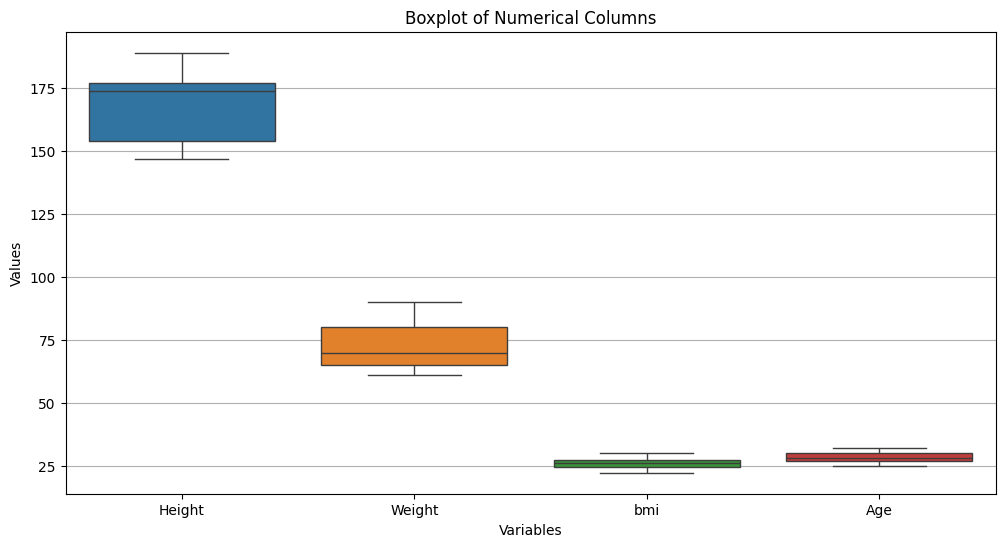

Measures of Shape (Skewness and Kurtosis):

        Skewness  Kurtosis
Height -0.175894 -1.351014
Weight  0.240826 -1.372808
bmi     0.150582 -1.002889
Age     0.191871 -1.146694


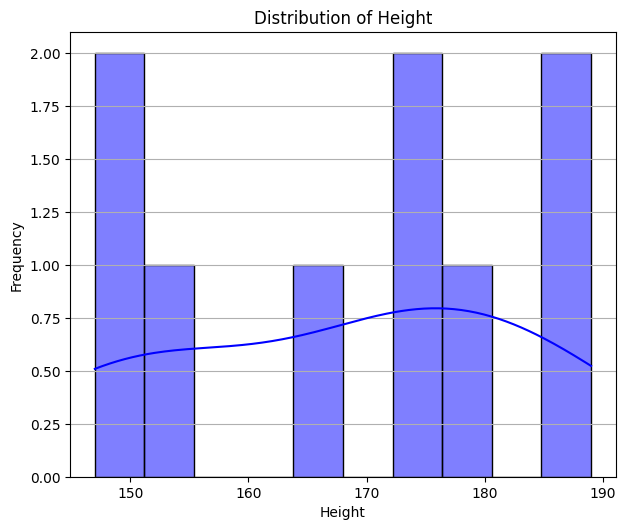

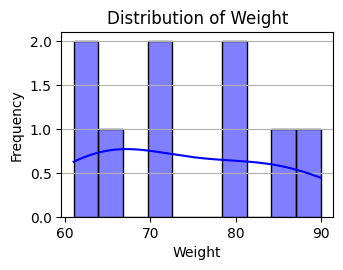

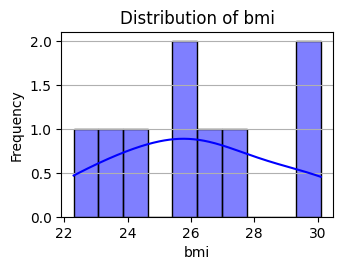

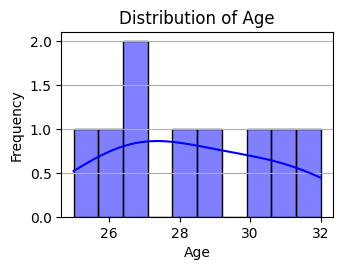

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
data = pd.read_csv('exp1_bmi.csv')

import pandas as pd

# Assuming 'data' is your DataFrame containing the data

numerical_columns = ['Height', 'Weight', 'bmi', 'Age']

# Mean
mean_values = data[numerical_columns].mean()

# Median
median_values = data[numerical_columns].median()

# Mode (with handling for multiple modes and cleaner output)
mode_values = data[numerical_columns].mode().iloc[0]  # Select the first row for modes
mode_values_dict = mode_values.to_dict()  # Convert to dictionary for cleaner output

# Display results
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values_dict)  # Print the dictionary of mode values

# Select numerical columns for analysis
numerical_columns = ['Height', 'Weight', 'bmi', 'Age']

# Measures of Spread and Quartiles
spread_stats = {}
for col in numerical_columns:
    q1 = np.percentile(data[col], 25)  # 25th percentile (Q1)
    q2 = np.percentile(data[col], 50)  # 50th percentile (Median or Q2)
    q3 = np.percentile(data[col], 75)  # 75th percentile (Q3)
    spread_stats[col] = {
        'Q1 (25th Percentile)': q1,
        'Median (Q2, 50th Percentile)': q2,
        'Q3 (75th Percentile)': q3,
'IQR (Q3 - Q1)': q3 - q1,  # Interquartile range
'Variance': np.var(data[col], ddof=1),  # Sample variance
'Standard Deviation': np.std(data[col], ddof=1),  # Sample standard deviation
'Range': data[col].max() - data[col].min(),  # Range
}
# Display calculated measures
spread_stats_df = pd.DataFrame(spread_stats).T
print("Measures of Spread and Quartiles:\n")
print(spread_stats_df)
# Boxplot to visualize the spread
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns])
plt.title("Boxplot of Numerical Columns")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.grid(True, axis='y')
plt.show()
numerical_columns = ['Height', 'Weight', 'bmi', 'Age']
# Measures of Shape: Skewness and Kurtosis
shape_stats = {}
for col in numerical_columns:
  shape_stats[col] = {
    'Skewness': skew(data[col]),  # Measure of symmetry
    'Kurtosis': kurtosis(data[col]),  # Measure of tail heaviness (excess kurtosis)
}
# Display calculated measures
shape_stats_df = pd.DataFrame(shape_stats).T
print("Measures of Shape (Skewness and Kurtosis):\n")
print(shape_stats_df)
# Visualizing the distribution of each column with histograms
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
  plt.subplot(2, 2, i)
  sns.histplot(data[col], kde=True, bins=10, color='blue')
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.grid(True, axis='y')
  plt.tight_layout()
  plt.show()

EXP 2 CLEANING


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import skew, kurtosis
df = pd.read_csv('DATA-CLEANING-EXT2-DATASET.csv')
print("Initial Data:")
print(df.info())
print(df.head(11))
# Handling missing values
num_imputer = SimpleImputer(strategy="mean")  # For numerical columns
cat_imputer = SimpleImputer(strategy="most_frequent")  # For categorical columns
for col in df.select_dtypes(include=['number']).columns:
    df[col] = num_imputer.fit_transform(df[[col]])
for col in df.select_dtypes(include=['object']).columns:
    # Use df[col] to get a Series instead of df[[col]] to get a DataFrame
    df[col] = cat_imputer.fit_transform(df[col].values.reshape(-1, 1))[:, 0]

# Display data after handling missing values
print("\nData after handling missing values:")
print(df.info())
print(df.head(11))

df.drop_duplicates(inplace=True)

print("\nData after removing duplicates:")
print(df.info())
print(df.head(11))

# Handling outliers using IQR for numerical features only
numerical_cols = df.select_dtypes(include=['number']).columns

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter outliers only for numerical features
df = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] >
upper_bound)).any(axis=1)]
print("\nData after handling outliers:")
print(df.info())
print(df.head(11))
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  df[col] = encoder.fit_transform(df[col])
print("\nData after encoding categorical variables:")
print(df.info())
print(df.head(11))
if 'joining date' in df.columns:
  df['joining date'] = pd.to_datetime(df['joining date'], errors='coerce')
print("\nFinal cleaned data:")
print(df.info())
print(df.head(11))
df.to_csv("cleaned_data.csv", index=False)
print("\nData cleaning completed. Cleaned dataset saved as 'cleaned_data.csv'.")

Initial Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            11 non-null     int64  
 1   Name          10 non-null     object 
 2   Age           10 non-null     float64
 3   Gender        11 non-null     object 
 4   Salary        10 non-null     float64
 5   Joining_Date  10 non-null     object 
 6   Department    11 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 748.0+ bytes
None
    ID     Name   Age   Gender   Salary Joining_Date Department
0    1    Alice  25.0   Female  50000.0   2021-06-01         HR
1    2      Bob  30.0     Male  60000.0   2020-07-15         IT
2    3  Charlie   NaN        M  70000.0   2019/08/20         HR
3    4    David  40.0     Male      NaN   2022-05-30    Finance
4    5      Eve  22.0   Female  55000.0   01-01-2018         IT
5    6    Frank  35.0        F  72000.0  

<ipython-input-4-a8d122cf414d>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])
<ipython-input-4-a8d122cf414d>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])
<ipython-input-4-a8d122cf414d>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

EXP 3 INF STAT

In [13]:
# import pandas as pd
# import scipy.stats as stats
# df = pd.read_excel('exp3_RelianceDataMart.xlsx')
# print("Initial Data:")
# print(df.info())
# print(df.head(11))
# # Assuming the 'Rice Bag' values are in a column named 'Rice_Bag'
# column_name = 'Rice_Bag_Weight'  # Change if needed
# # Check if column exists
# if column_name not in df.columns:

#     raise ValueError(f"Column '{column_name}' not found in dataset.")

# # Drop NaN values if any
# df = df.dropna(subset=[column_name])
# # Hypothesized population mean (change this as needed)
# population_mean = 25 # Example value
# # Perform One-Sample t-test
# t_stat, p_value = stats.ttest_1samp(df[column_name], population_mean)
# # Display results
# print("\nOne-Sample t-test Results:")
# print(f"T-Statistic: {t_stat}")
# print(f"P-Value: {p_value}")
# # Conclusion based on p-value
# alpha = 0.05  # Significance level
# if p_value < alpha:
#     print("Result: Reject the null hypothesis (Significant difference found).")
# else:
#     print("Result: Fail to reject the null hypothesis (No significant difference found).")
# # Statistical Calculations
# mean_value = df[column_name].mean()
# median_value = df[column_name].median()
# mode_value = df[column_name].mode()[0]
# max_value = df[column_name].max()
# min_value = df[column_name].min()
# std_dev = df[column_name].std()
# std_error = stats.sem(df[column_name])
# kurtosis_value = stats.kurtosis(df[column_name])
# skewness_value = stats.skew(df[column_name])
# range_value = max_value - min_value
# sum_value = df[column_name].sum()
# count_value = df[column_name].count()
# # Display statistical values
# print("\nDescriptive Statistics:")

# print(f"Mean: {mean_value}")
# print(f"Median: {median_value}")
# print(f"Mode: {mode_value}")
# print(f"Max Value: {max_value}")
# print(f"Min Value: {min_value}")
# print(f"Standard Deviation: {std_dev}")
# print(f"Standard Error: {std_error}")
# print(f"Kurtosis: {kurtosis_value}")
# print(f"Skewness: {skewness_value}")
# print(f"Range: {range_value}")
# print(f"Sum: {sum_value}")
# print(f"Count: {count_value}")
# # Hypothesized population mean
# population_mean = 25  # Updated as per request
# # Perform One-Sample t-test
# t_stat, p_value = stats.ttest_1samp(df[column_name], population_mean)
# # T Critical Value
# alpha = 0.05
# degrees_of_freedom = count_value - 1
# t_critical = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
# # Display results
# print("\nOne-Sample t-test Results:")
# print(f"T-Statistic: {t_stat}")
# print(f"P-Value: {p_value}")
# print(f"T Critical Value: {t_critical}")
# # Conclusion based on p-value
# if p_value < alpha:
#     print("Result: Reject the null hypothesis (Significant difference found).")
# else:
#     print("Result: Fail to reject the null hypothesis (No significant difference found).")

# OR

import pandas as pd
import scipy.stats as stats
# Load Pre-Post Score dataset

pre_post_file = "exp3_Pre_Post_Score.xlsx"
sheet_name = "Sheet1"
pre_post_df = pd.read_excel(pre_post_file, sheet_name = sheet_name)
# Display first few rows to inspect the data
print("Pre-Post Score Data:")
print(pre_post_df.head())
# Assuming 'Pre_Score' and 'Post_Score' are the correct column names
pre_col, post_col = 'Pre_Score', 'Post_Score'
if pre_col not in pre_post_df.columns or post_col not in pre_post_df.columns:
    raise ValueError("Pre_Score or Post_Score column not found in dataset.")
# Convert 'Post_Score' column to numeric, errors='coerce' will replace non-numeric values with NaN
pre_post_df[post_col] = pd.to_numeric(pre_post_df[post_col], errors='coerce')
# Drop NaN values if any
pre_post_df = pre_post_df.dropna(subset=[pre_col, post_col])
# Compute statistics
mean_pre = pre_post_df[pre_col].mean()
mean_post = pre_post_df[post_col].mean()
var_pre = pre_post_df[pre_col].var()
var_post = pre_post_df[post_col].var()
n = pre_post_df.shape[0]  # Number of observations
pearson_corr = pre_post_df[pre_col].corr(pre_post_df[post_col])
hypo_mean_diff = 0  # Hypothesized mean difference
df = n - 1  # Degrees of freedom
# Perform Paired Sample t-test
t_stat, p_value_two_tail = stats.ttest_rel(pre_post_df[pre_col],
pre_post_df[post_col])
p_value_one_tail = p_value_two_tail / 2
# T Critical Values
alpha = 0.05
t_critical_one_tail = stats.t.ppf(1 - alpha, df)
t_critical_two_tail = stats.t.ppf(1 - alpha / 2, df)
# Display results

print("\nPaired Sample T-Test Results:")
print(f"Mean Pre-Score: {mean_pre}")
print(f"Mean Post-Score: {mean_post}")
print(f"Variance Pre-Score: {var_pre}")
print(f"Variance Post-Score: {var_post}")
print(f"Number of Observations: {n}")
print(f"Pearson Correlation: {pearson_corr}")
print(f"Hypothesized Mean Difference: {hypo_mean_diff}")
print(f"Degrees of Freedom: {df}")
print(f"T-Statistic: {t_stat}")
print(f"P-Value (One-Tail): {p_value_one_tail}")
print(f"T Critical Value (One-Tail): {t_critical_one_tail}")
print(f"P-Value (Two-Tail): {p_value_two_tail}")
print(f"T Critical Value (Two-Tail): {t_critical_two_tail}")
# Conclusion based on p-value
if p_value_two_tail < alpha:
    print("Result: Reject the null hypothesis (Significant difference found).")
else:
    print("Result: Fail to reject the null hypothesis (No significant difference found).")

Pre-Post Score Data:
   Pre_Score Post_Score  Diff  Unnamed: 3  Unnamed: 4 Unnamed: 5  Unnamed: 6
0       18.0         22  -4.0         NaN         NaN        NaN         NaN
1       21.0         25  -4.0         NaN         NaN        NaN         NaN
2       16.0         17  -1.0         NaN         NaN        NaN         NaN
3       22.0         24  -2.0         NaN         NaN        NaN         NaN
4       19.0         16   3.0         NaN         NaN        NaN         NaN

Paired Sample T-Test Results:
Mean Pre-Score: 18.4
Mean Post-Score: 20.45
Variance Pre-Score: 9.936842105263159
Variance Post-Score: 16.471052631578946
Number of Observations: 20
Pearson Correlation: 0.7174770398523397
Hypothesized Mean Difference: 0
Degrees of Freedom: 19
T-Statistic: -3.231252665580312
P-Value (One-Tail): 0.002197482996592832
T Critical Value (One-Tail): 1.729132811521367
P-Value (Two-Tail): 0.004394965993185664
T Critical Value (Two-Tail): 2.093024054408263
Result: Reject the null hypothesis

EXP 4 VISUALIZATION

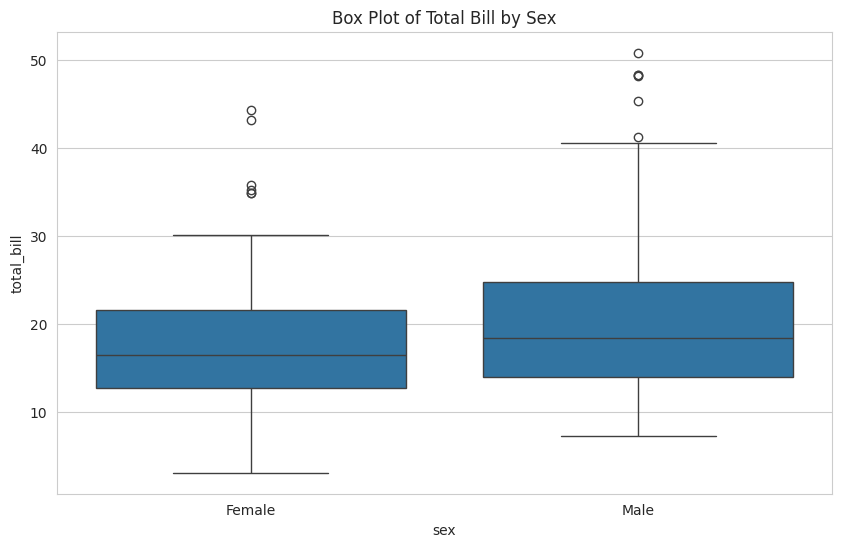

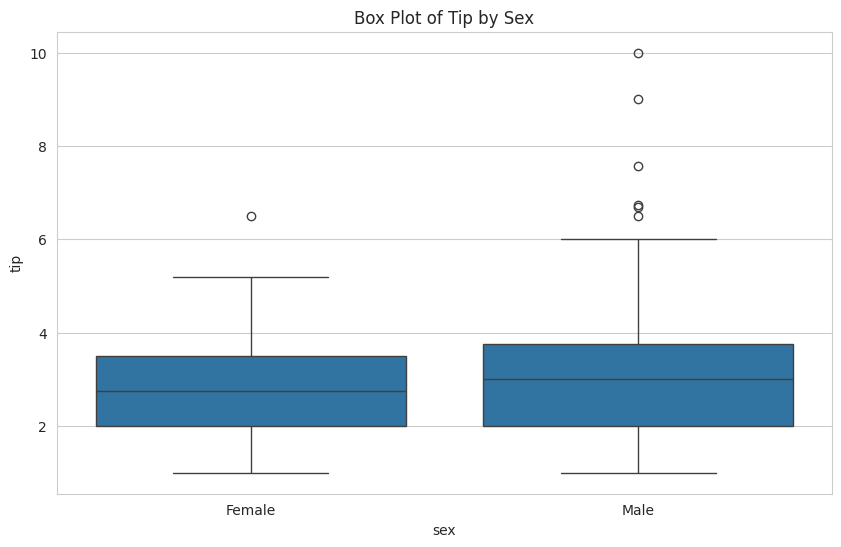

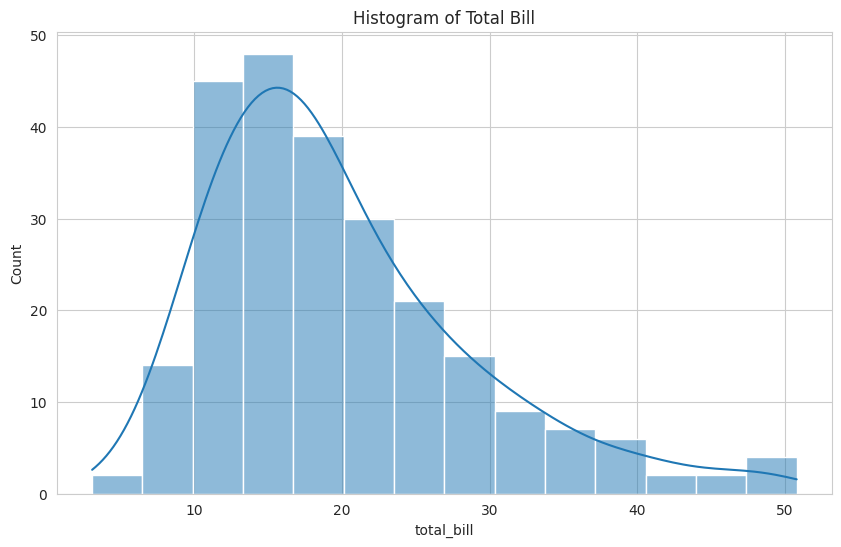

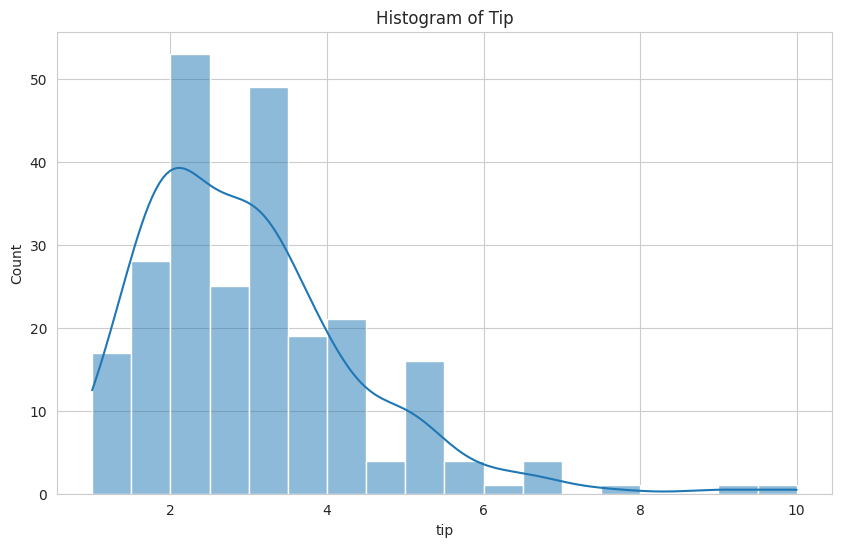

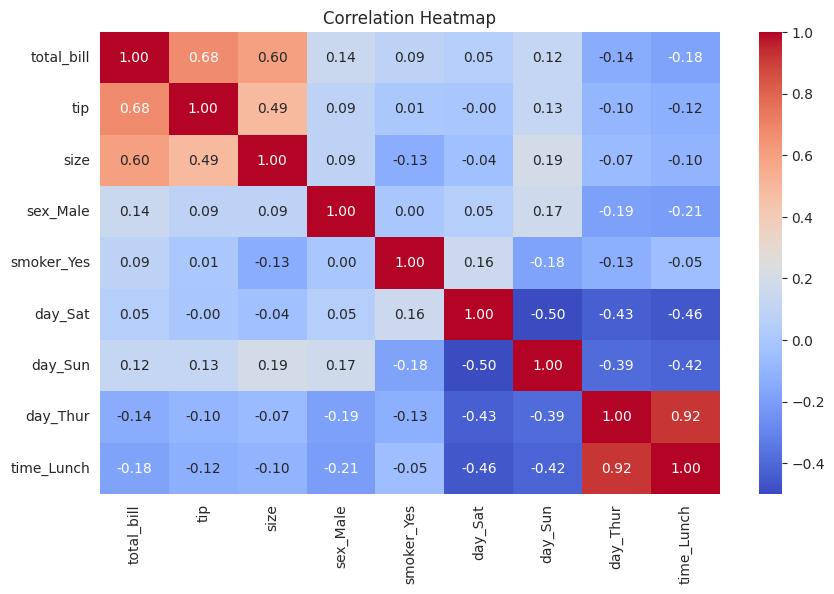

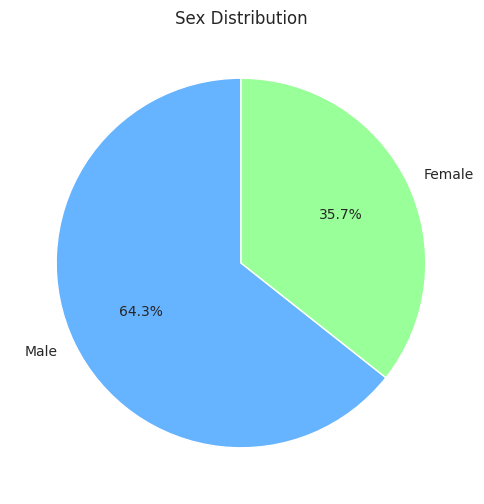

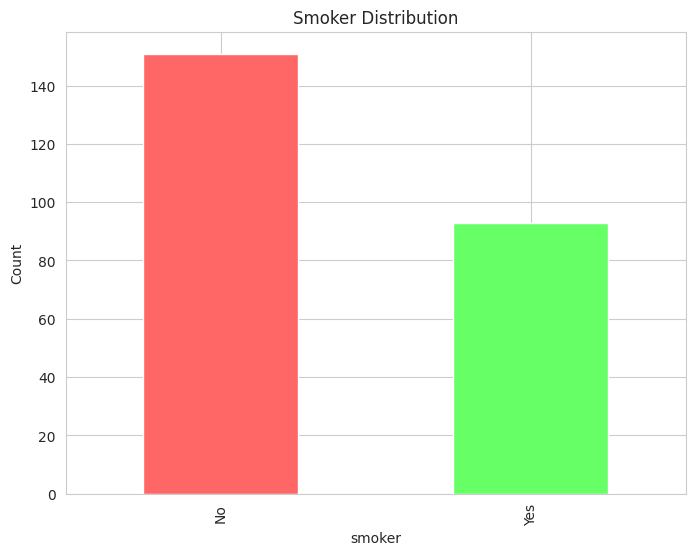

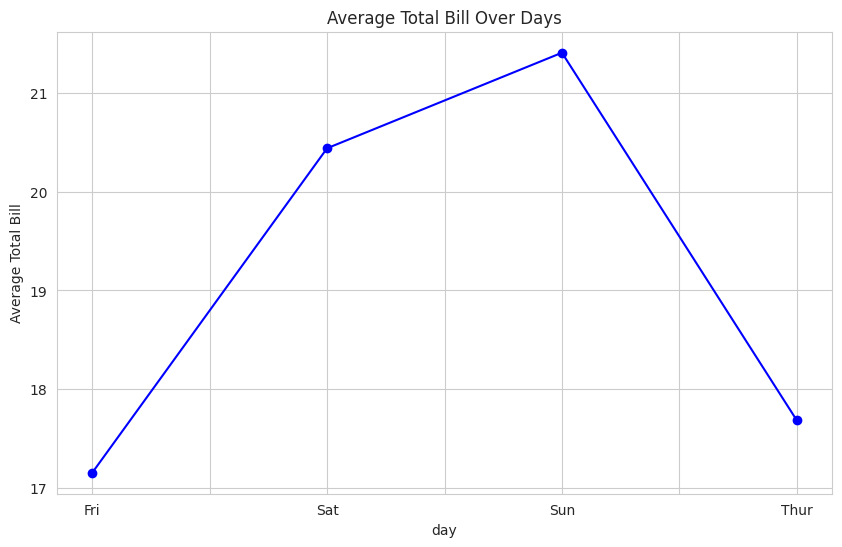

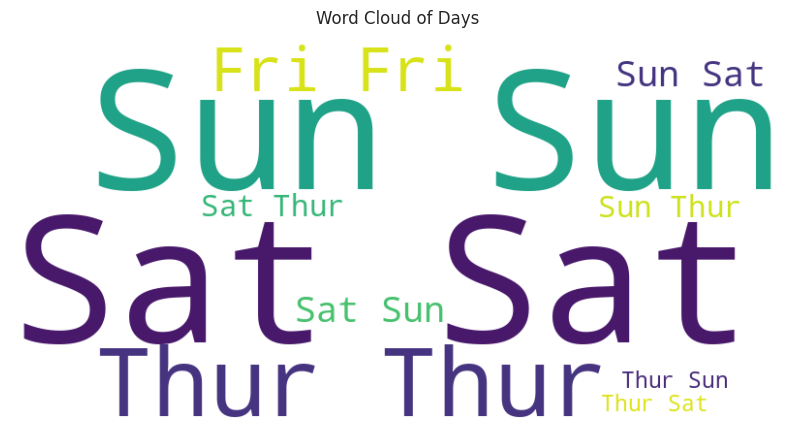

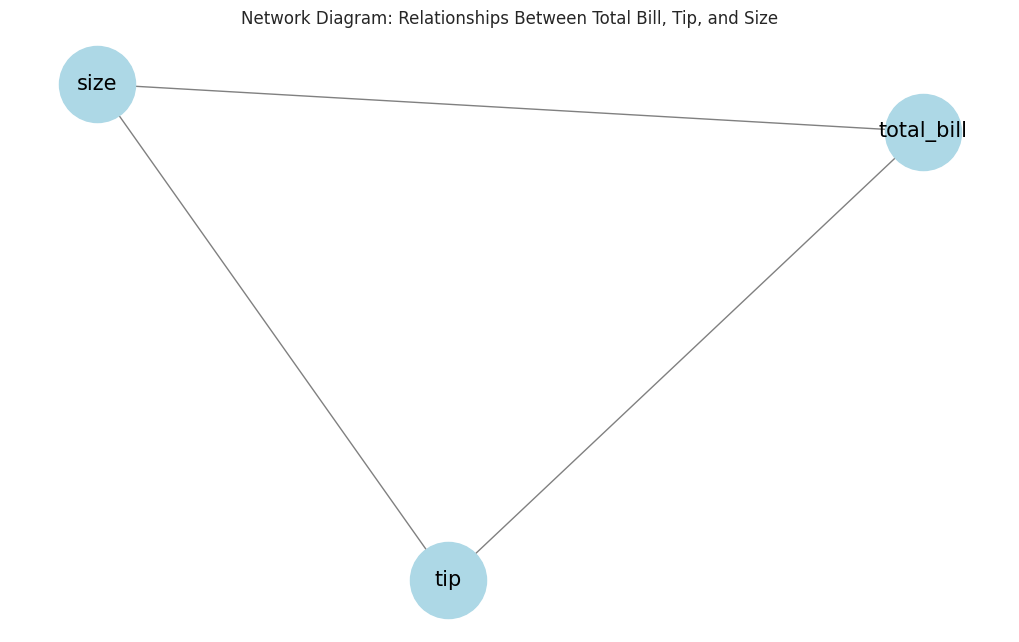

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import networkx as nx

file_path = "tips-expt4 - tips-expt4.csv"
df = pd.read_csv(file_path)

# Box plot for 'total_bill' and 'tip' by 'sex'
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='total_bill', data=df)
plt.title('Box Plot of Total Bill by Sex')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='tip', data=df)
plt.title('Box Plot of Tip by Sex')
plt.show()

# Histogram for 'total_bill'
plt.figure(figsize=(10, 6))
sns.histplot(df['total_bill'], kde=True)
plt.title('Histogram of Total Bill')
plt.show()

# Histogram for 'tip'
plt.figure(figsize=(10, 6))
sns.histplot(df['tip'], kde=True)
plt.title('Histogram of Tip')
plt.show()

# Correlation Heatmap
# One-hot encode categorical columns (e.g., 'sex', 'smoker', 'day', 'time')
df_encoded = pd.get_dummies(df, drop_first=True)

# Now plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pie chart for the distribution of 'sex'
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 6))
sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Sex Distribution')
plt.ylabel('')
plt.show()

# Bar chart for 'smoker' distribution
smoker_counts = df['smoker'].value_counts()
plt.figure(figsize=(8, 6))
smoker_counts.plot(kind='bar', color=['#ff6666', '#66ff66'])
plt.title('Smoker Distribution')
plt.ylabel('Count')
plt.show()

# Line chart for 'total_bill' over different days
day_avg_total_bill = df.groupby('day')['total_bill'].mean()
plt.figure(figsize=(10, 6))
day_avg_total_bill.plot(kind='line', marker='o', color='b')
plt.title('Average Total Bill Over Days')
plt.ylabel('Average Total Bill')
plt.show()

import plotly.express as px

# Tree Map for 'size' vs 'tip' category-wise
fig = px.treemap(df, path=['smoker', 'sex'], values='tip', title="Tree Map of Tips by Smoker and Sex")
fig.show()

# Word Cloud for 'day' column frequency
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['day']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Days')
plt.axis('off')
plt.show()

# Network Diagram for the correlation between 'total_bill', 'tip', and 'size'
G = nx.Graph()
G.add_edges_from([('total_bill', 'tip'), ('tip', 'size'), ('total_bill', 'size')])
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='lightblue', font_size=15, node_size=3000, edge_color='gray')
plt.title('Network Diagram: Relationships Between Total Bill, Tip, and Size')
plt.show()


EXP 4 TITANIC VISUALIZATION


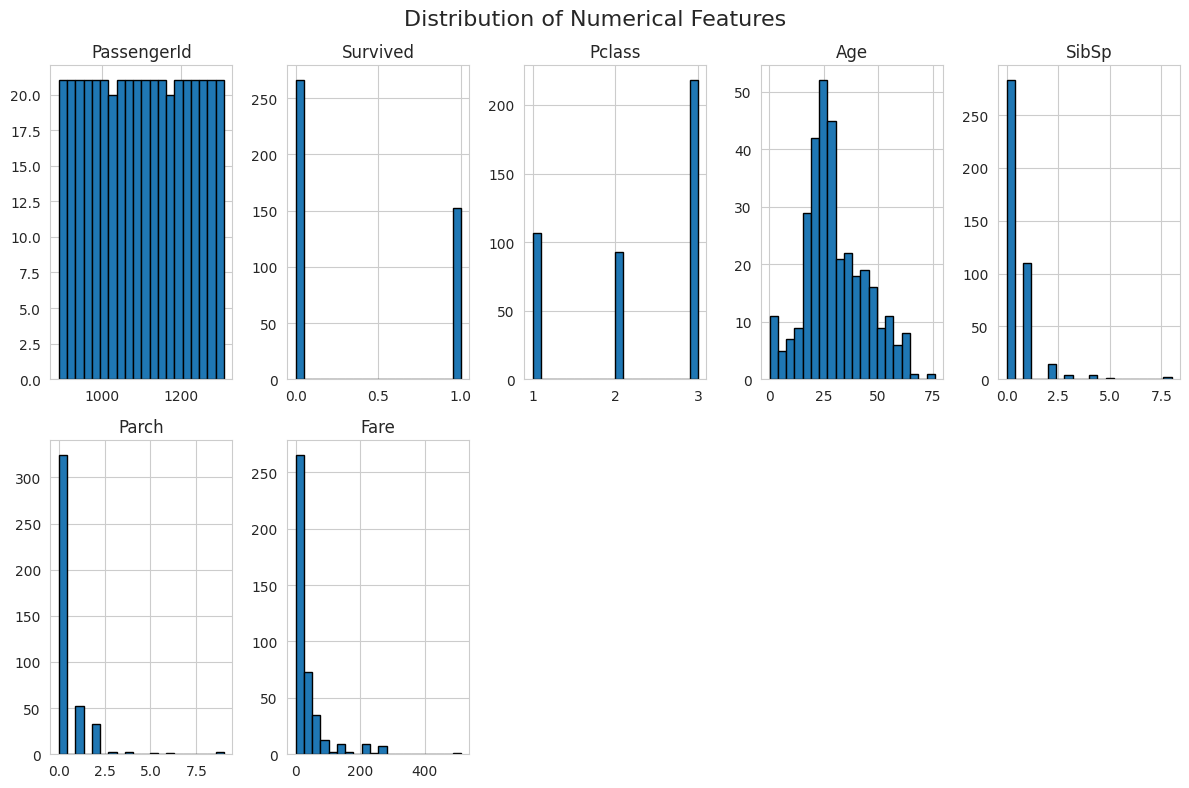

<ipython-input-21-2df3df2fdba8>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df["Age"], ax=axes[0], palette="pastel")
<ipython-input-21-2df3df2fdba8>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df["Fare"], ax=axes[1], palette="pastel")


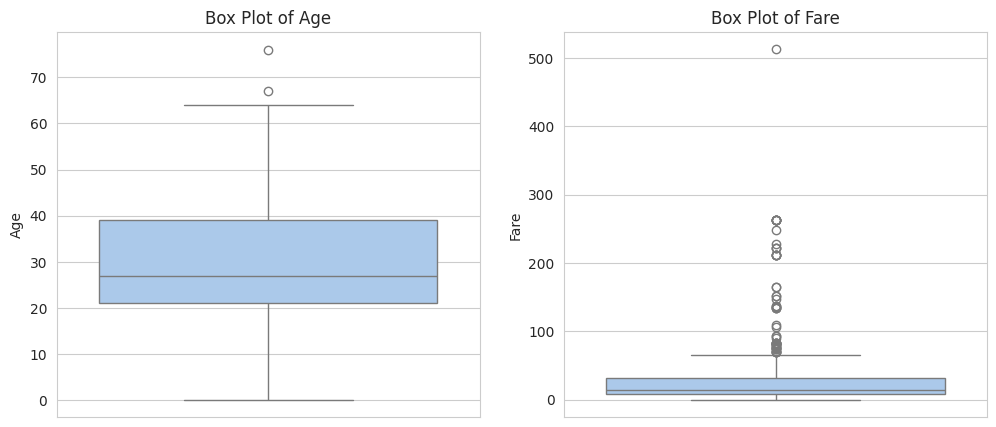

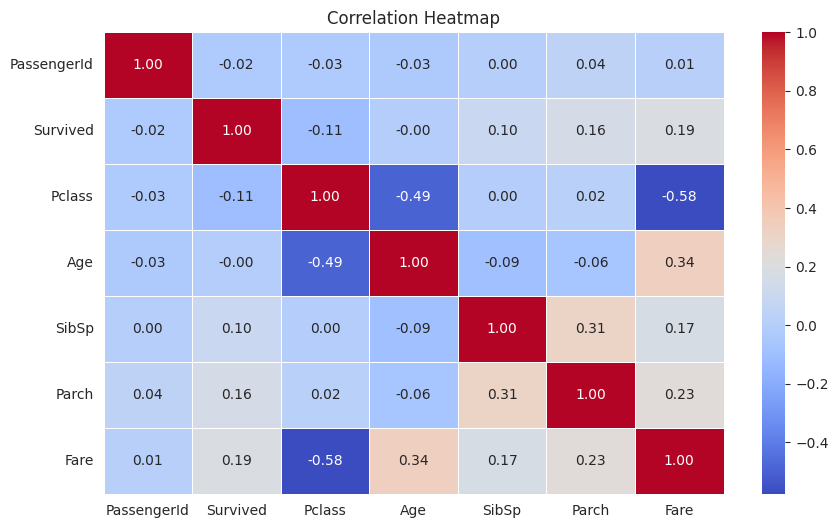

<ipython-input-21-2df3df2fdba8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, palette="coolwarm")


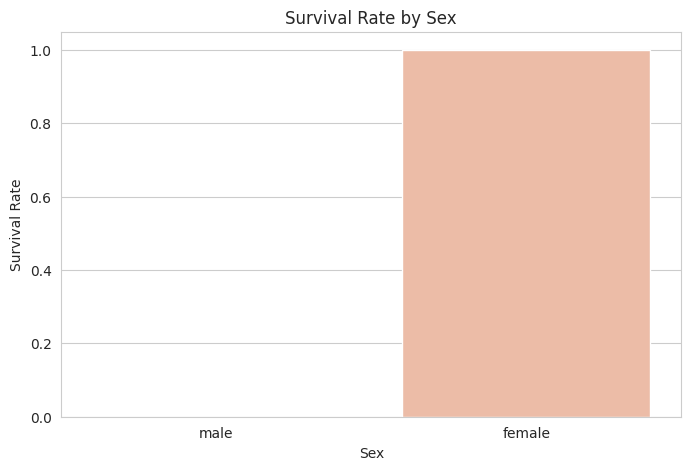

<ipython-input-21-2df3df2fdba8>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="coolwarm")


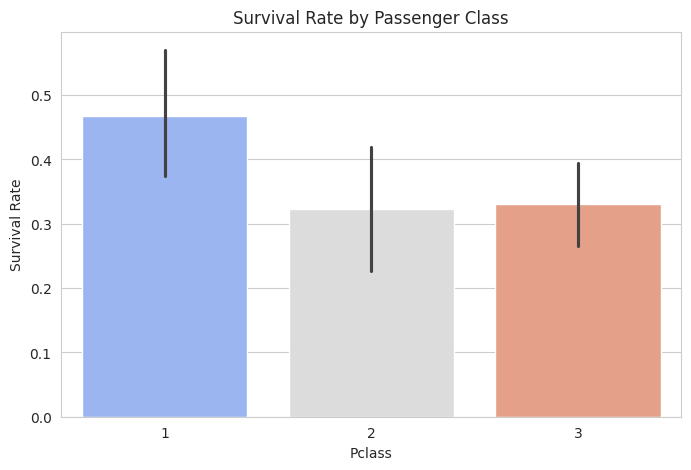

<ipython-input-21-2df3df2fdba8>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Embarked", y="Survived", data=df, palette="coolwarm")


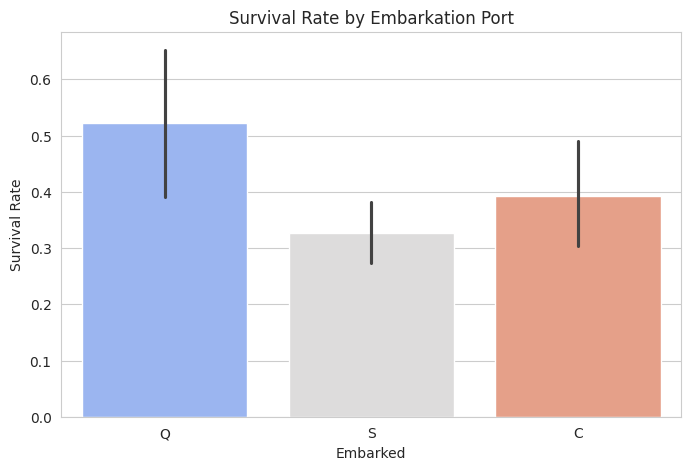

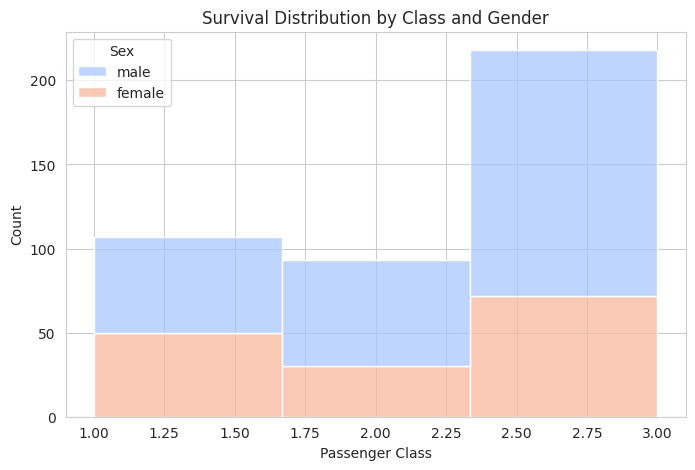

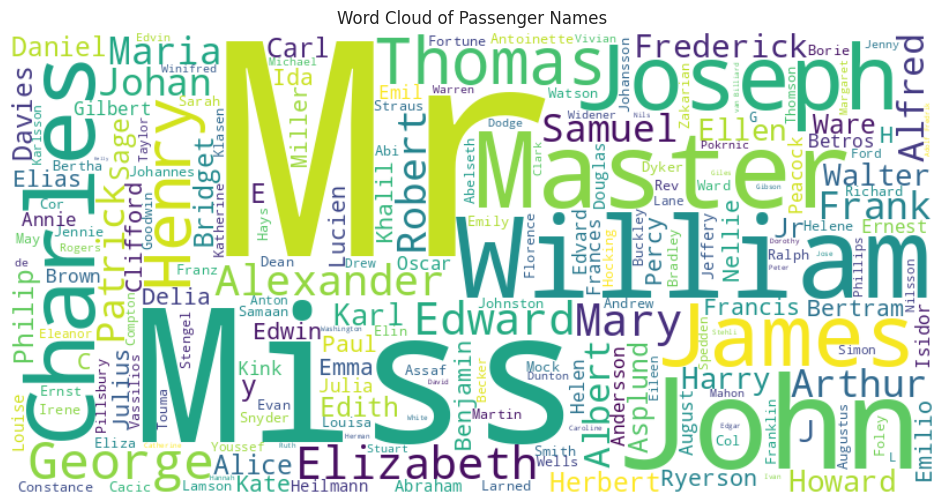

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Load the Titanic dataset
file_path = "tested.csv"
df = pd.read_csv(file_path)
# Set a visual style
sns.set_style("whitegrid")
# Get numerical columns only
numerical_features = df.select_dtypes(include=['number']).columns
# Number of histograms to plot
n = len(numerical_features)
# Calculate the required number of rows and columns for the layout
ncols = 5  # You can adjust this number
nrows = (n // ncols) + (1 if n % ncols else 0)
# Plot histograms for numerical features
df[numerical_features].hist(figsize=(12, 8), bins=20, edgecolor='black', layout=(nrows, ncols))
# Set title
plt.suptitle("Distribution of Numerical Features", fontsize=16)
# Show the plot
plt.tight_layout()
plt.show()
# Box plots for Age and Fare to identify outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df["Age"], ax=axes[0], palette="pastel")
axes[0].set_title("Box Plot of Age")
sns.boxplot(y=df["Fare"], ax=axes[1], palette="pastel")
axes[1].set_title("Box Plot of Fare")
plt.show()
# Heatmap to show correlations
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
# Bar plot for survival rate by Sex
plt.figure(figsize=(8, 5))
sns.barplot(x="Sex", y="Survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()
# Bar plot for survival rate by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()
# Bar plot for survival rate by Embarked location
plt.figure(figsize=(8, 5))
sns.barplot(x="Embarked", y="Survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()
# Stacked bar plot for survival by class and gender
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Pclass", hue="Sex", multiple="stack", palette="coolwarm", bins=3)
plt.title("Survival Distribution by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()
# Generate a word cloud for passenger names
# Combine all names into one string
text_data = ' '.join(df['Name'].dropna().astype(str))
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Passenger Names")
plt.show()

EXP 5 SMOTE


In [27]:
# import numpy as np
# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Load your dataset (replace with your actual CSV path if needed)
# df = pd.read_csv("exp5_Admission_St.csv")  # Make sure 'Admit', 'GRE', 'GPA', 'RANK' exist

# # Set feature matrix X and target y
# X = df.drop(columns=['Admit'])  # Features: GRE, GPA, RANK
# y = df['Admit']                 # Target: Admit (0 or 1)

# # Handle any missing values
# X.fillna(X.mean(), inplace=True)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# # Show class distribution before SMOTE
# print("Class distribution before SMOTE:")
# print(y_train.value_counts())

# # Apply SMOTE to training data
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # Show class distribution after SMOTE
# print("\nClass distribution after SMOTE:")
# print(y_train_smote.value_counts())

# # Train classifier before SMOTE
# clf_before = RandomForestClassifier(random_state=42, n_jobs=-1)
# clf_before.fit(X_train, y_train)
# y_pred_before = clf_before.predict(X_test)

# # Train classifier after SMOTE
# clf_after = RandomForestClassifier(random_state=42, n_jobs=-1)
# clf_after.fit(X_train_smote, y_train_smote)
# y_pred_after = clf_after.predict(X_test)

# # Evaluation
# print("\nPerformance before SMOTE:")
# print(classification_report(y_test, y_pred_before))
# print("Accuracy:", accuracy_score(y_test, y_pred_before))

# print("\nPerformance after SMOTE:")
# print(classification_report(y_test, y_pred_after))
# print("Accuracy:", accuracy_score(y_test, y_pred_after))

# OR

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Step 1: Load data (Assume this is already loaded in your case)
df = pd.read_csv("exp5_50_Startups.csv")  # Replace with actual dataset path

# Step 2: Encode categorical column
df['State'] = LabelEncoder().fit_transform(df['State'])  # California=0, Florida=1, New York=2

# Step 3: Binary target based on median of 'Profit'
median_profit = df['Profit'].median()
df['HighProfit'] = (df['Profit'] > median_profit).astype(int)

X = df.drop(['Profit', 'HighProfit'], axis=1)
y = df['HighProfit']

# Step 4: Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Step 5: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts())

# Step 6: Train classifier before applying SMOTE
model_before = RandomForestClassifier(random_state=42)
model_before.fit(X_train, y_train)
y_pred_before = model_before.predict(X_test)

print("\nPerformance BEFORE SMOTE:")
print(classification_report(y_test, y_pred_before))
print("Accuracy:", accuracy_score(y_test, y_pred_before))

# Step 7: Train classifier after applying SMOTE
model_after = RandomForestClassifier(random_state=42)
model_after.fit(X_train_smote, y_train_smote)
y_pred_after = model_after.predict(X_test)

print("\nPerformance AFTER SMOTE:")
print(classification_report(y_test, y_pred_after))
print("Accuracy:", accuracy_score(y_test, y_pred_after))





Class distribution before SMOTE:
HighProfit
1    22
0    18
Name: count, dtype: int64

Class distribution after SMOTE:
HighProfit
1    22
0    22
Name: count, dtype: int64

Performance BEFORE SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10

Accuracy: 0.9

Performance AFTER SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10

Accuracy: 0.9


EXP 6 OUTLIER

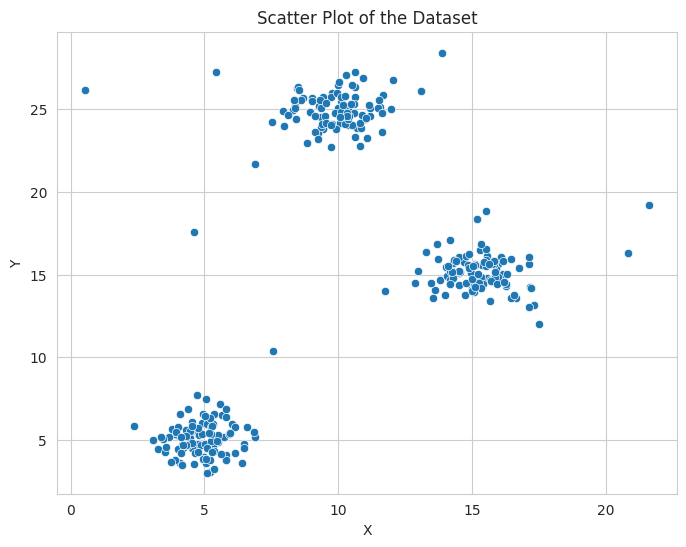

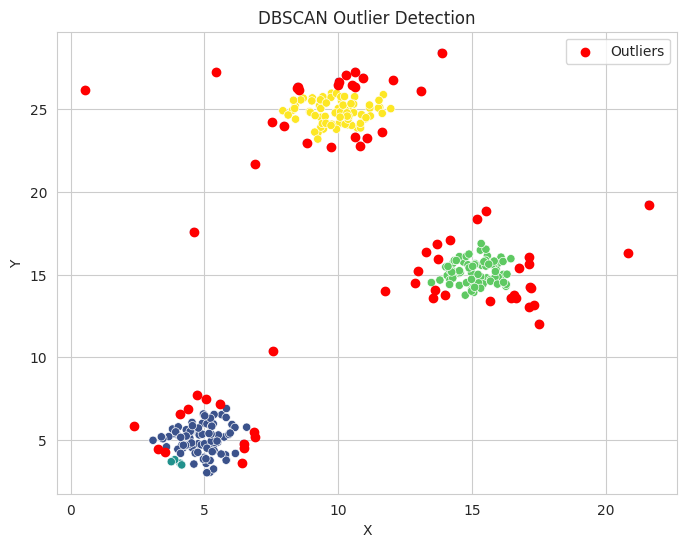

      Metric  Before Outlier Removal  After Outlier Removal
0   Accuracy                0.967742                    1.0
1  Precision                0.923077                    1.0
2     Recall                0.923077                    1.0
3   F1 Score                0.923077                    1.0


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
file_path = "dbscan_outlier_dataset - dbscan_outlier_dataset.csv"
df = pd.read_csv(file_path)

# Plotting the scatter plot of the dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["X"], y=df["Y"])
plt.title("Scatter Plot of the Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["cluster"] = dbscan.fit_predict(df[["X", "Y"]])

# Identify outliers
outliers_dbscan = df[df["cluster"] == -1]

# Plot DBSCAN clustering result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["X"], y=df["Y"], hue=df["cluster"], palette="viridis", legend=False)
plt.scatter(outliers_dbscan["X"], outliers_dbscan["Y"], color="red", label="Outliers")
plt.title("DBSCAN Outlier Detection")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Assign label 1 for outliers (cluster == -1), 0 otherwise
df["label"] = np.where(df["cluster"] == -1, 1, 0)

# Clean dataset by removing outliers
df_cleaned = df[df["cluster"] != -1].drop(columns=["cluster"])

# After cleaning, set the label to 0 (since all points are non-outliers)
df_cleaned["label"] = 0

# Split data into training and testing sets (before outlier removal)
X_train, X_test, y_train, y_test = train_test_split(df[["X", "Y"]], df["label"], test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and metrics for the original dataset
y_pred = model.predict(X_test)

# Metrics for the original data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

# Split data into training and testing sets (after outlier removal)
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(df_cleaned[["X", "Y"]], df_cleaned["label"], test_size=0.2, random_state=42)

# Train the model on cleaned data
model_cleaned = RandomForestClassifier(n_estimators=100, random_state=42)
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predictions and metrics for the cleaned dataset
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

# Metrics for the cleaned data
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
precision_cleaned = precision_score(y_test_cleaned, y_pred_cleaned, zero_division=1)
recall_cleaned = recall_score(y_test_cleaned, y_pred_cleaned, zero_division=1)
f1_cleaned = f1_score(y_test_cleaned, y_pred_cleaned, zero_division=1)

# Performance comparison before and after outlier removal
performance_comparison = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Before Outlier Removal": [accuracy, precision, recall, f1],
    "After Outlier Removal": [accuracy_cleaned, precision_cleaned, recall_cleaned, f1_cleaned],
}

# Create a DataFrame for comparison
performance_df = pd.DataFrame(performance_comparison)
print(performance_df)


EXP 7 TIME SERIES


<ipython-input-34-1308b5e1bf6e>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series.index = pd.to_datetime(time_series.index)


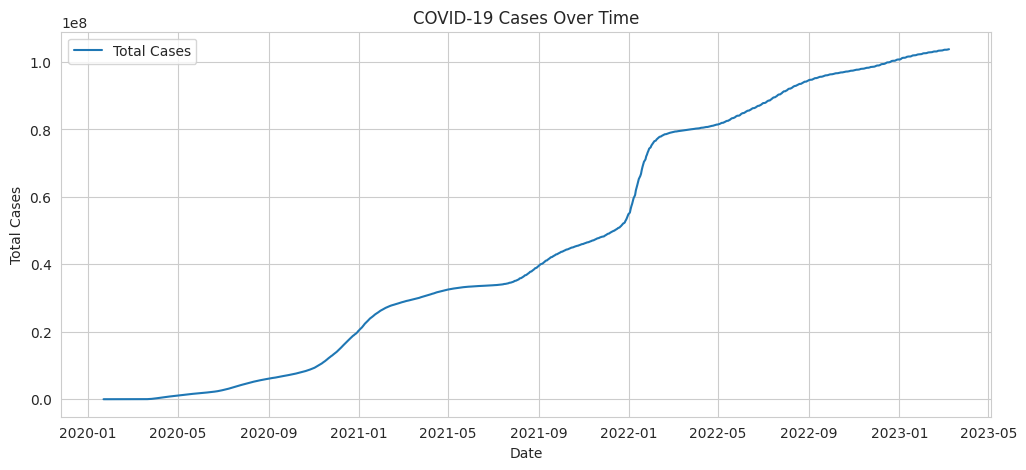

ADF Statistic: -0.03337976177101878
p-value: 0.9556829980610124
Series is NOT stationary
ADF Statistic: -4.326191879161942
p-value: 0.0004000393176799628
Series is stationary


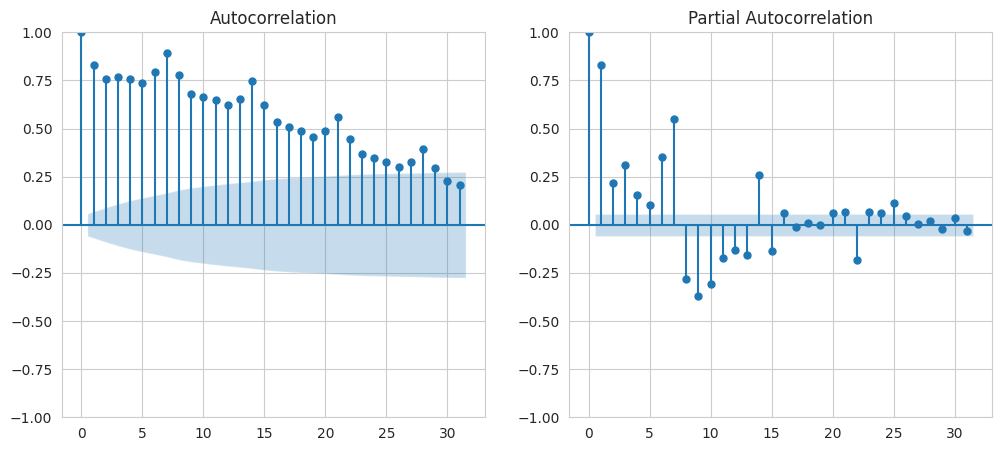

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1143
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14229.822
Date:                Mon, 21 Apr 2025   AIC                          28469.645
Time:                        14:52:48   BIC                          28494.847
Sample:                    01-22-2020   HQIC                         28479.161
                         - 03-09-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4788      0.033     14.525      0.000       0.414       0.543
ar.L2          0.5090      0.033     15.429      0.000       0.444       0.574
ma.L1         -0.0196      0.024     -0.816      0.4

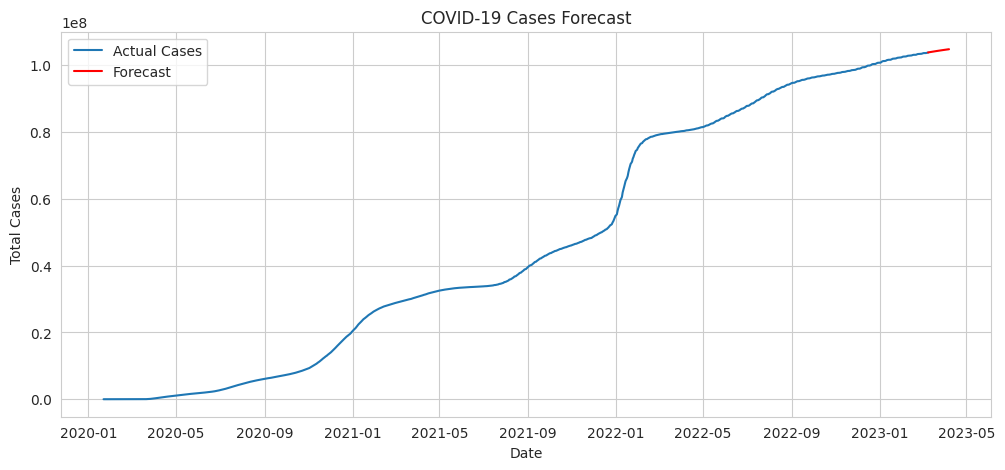

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load dataset
file_path = "Expt-7_time_series_covid19.csv"
df = pd.read_csv(file_path)

# Drop non-date columns
date_columns = df.columns[11:]  # Date columns start from the 12th column

# Convert to time series format by summing all locations
time_series = df[date_columns].sum(axis=0)

# Convert index to datetime
time_series.index = pd.to_datetime(time_series.index)

# Plot the series
plt.figure(figsize=(12, 5))
plt.plot(time_series, label="Total Cases")
plt.title("COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

# Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Series is stationary")
    else:
        print("Series is NOT stationary")

# Perform ADF test on the original time series
adf_test(time_series)

# Difference the series to make it stationary
diff_series = time_series.diff().dropna()

# Perform ADF test on the differenced series
adf_test(diff_series)

# Plot ACF and PACF for identifying AR and MA components
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(diff_series, ax=ax[0])  # Identifies MA component (q)
plot_pacf(diff_series, ax=ax[1])  # Identifies AR component (p)
plt.show()

# Fit an ARIMA model (order=(p, d, q))
model = ARIMA(time_series, order=(2, 1, 2))
model_fit = model.fit()

# Print summary of the model fit
print(model_fit.summary())

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot actual vs forecasted cases
plt.figure(figsize=(12, 5))
plt.plot(time_series, label="Actual Cases")
plt.plot(pd.date_range(start=time_series.index[-1], periods=30, freq="D"), forecast, label="Forecast", color="red")
plt.title("COVID-19 Cases Forecast")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()
